In [1]:
import os
os.environ['OPENBLAS_NUM_THREADS'] = '16'  # noqa, must go before jax

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from os.path import join as pjoin
from collections import defaultdict

from pmwd import linear_power
from pmwd.spec_util import powspec
from pmwd.vis_util import simshow
from pmwd import (Configuration, Cosmology, boltzmann)
import logging

In [2]:
wdir = '/home/mattho/git/ltu-cmass/data'


## 1Gpc/h pmwd vs quijote

### comoving halos

In [8]:
# load comoving

lhid = 3

# pmwd
suite = 'charm_1gpch_z0.5'
sim = 'borgpm'
simdir = pjoin(wdir, suite, sim, 'L1000-N128')
source_path = pjoin(simdir, f'{lhid}')
ppos = np.load(pjoin(source_path, 'halo_pos.npy'))
pvel = np.load(pjoin(source_path, 'halo_vel.npy'))
pmass = np.load(pjoin(source_path, 'halo_mass.npy'))

# quijote
suite = 'quijote'
sim = 'latin_hypercube_HR'
simdir = pjoin(wdir, suite, sim, 'L1000-N128')
source_path = pjoin(simdir, f'{lhid}')
qpos = np.load(pjoin(source_path, 'halo_pos.npy'))
qvel = np.load(pjoin(source_path, 'halo_vel.npy'))
qmass = np.load(pjoin(source_path, 'halo_mass.npy'))

mask = qmass > 13
qpos = qpos[mask]
qvel = qvel[mask]
qmass = qmass[mask]

In [9]:

lhids = os.listdir(simdir)
counter = defaultdict(int)
bad = []
for lh in lhids:
    lpath = pjoin(simdir, lh)
    if not os.path.isdir(lpath):
        continue
    files = os.listdir(lpath)
    for f in files:
        counter[f] += 1
counter

defaultdict(int,
            {'halo_mass.npy': 2000,
             'halo_pos.npy': 2000,
             'halo_vel.npy': 2000,
             'halo_cuboid_pos.npy': 16,
             'halo_cuboid_vel.npy': 16,
             'hod': 16,
             'obs': 16,
             'Pk': 1})

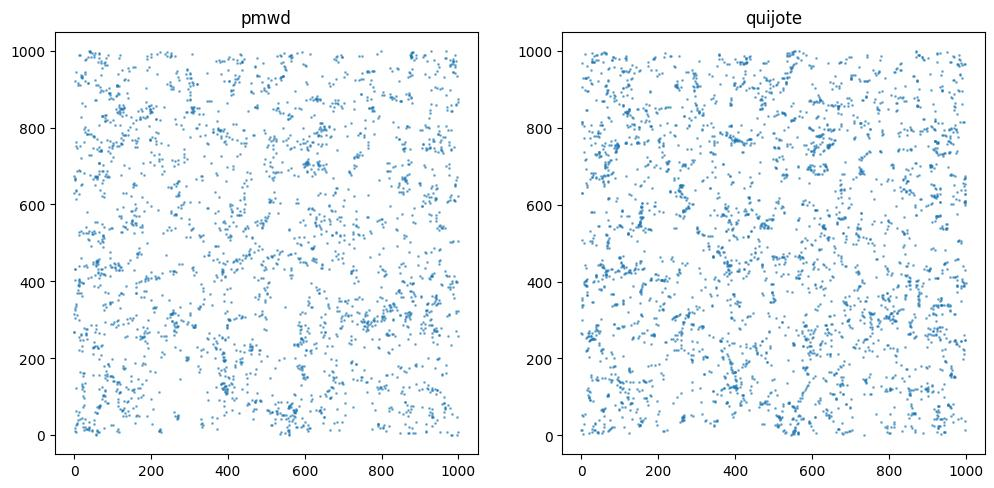

In [11]:
zsli = [540,550]

f, axs = plt.subplots(1, 2, figsize=(12,6))

ax = axs[0]
mask = (ppos[:,2] > zsli[0]) & (ppos[:,2] < zsli[1])
x_ = ppos[mask]
ax.plot(x_[:,0], x_[:,1], 'o', markersize=1, alpha=0.5)
ax.set_title('pmwd')
ax.set_aspect('equal')

ax = axs[1]
mask = (qpos[:,2] > zsli[0]) & (qpos[:,2] < zsli[1])
x_ = qpos[mask]
ax.plot(x_[:,0], x_[:,1], 'o', markersize=1, alpha=0.5)
ax.set_title('quijote')
ax.set_aspect('equal')

Text(0, 0.5, 'count')

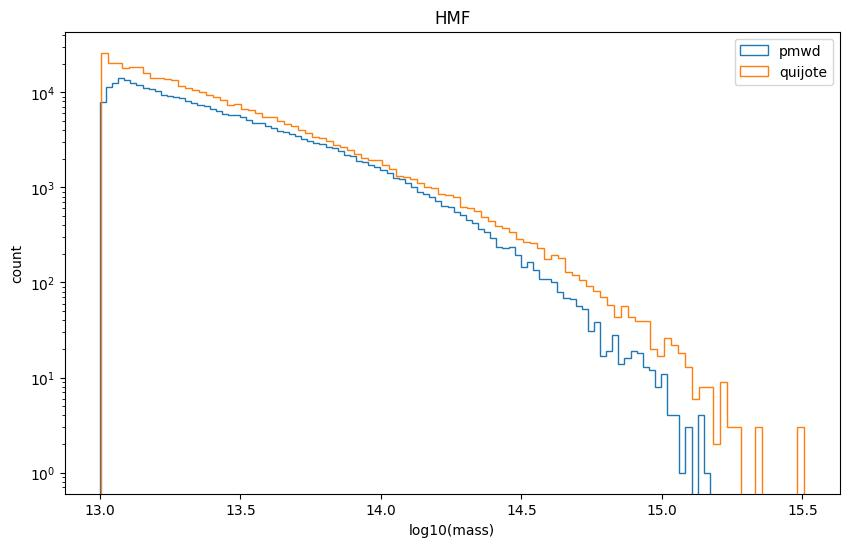

In [13]:
f, ax = plt.subplots(1, 1, figsize=(10,6))

ax.hist(pmass, bins=100, histtype='step', label='pmwd')
ax.hist(qmass, bins=100, histtype='step', label='quijote')
ax.set_yscale('log')
ax.legend()
ax.set_title('HMF')
ax.set_xlabel('log10(mass)')
ax.set_ylabel('count')


### cuboid halos

In [14]:
# load cuboid

lhid = 3

# pmwd
suite = 'calib_1gpch_z0.5'
sim = 'pmwd'
simdir = pjoin(wdir, suite, sim, 'L1000-N128')
source_path = pjoin(simdir, f'{lhid}')
pcpos = np.load(pjoin(source_path, 'halo_cuboid_pos.npy'))
pcvel = np.load(pjoin(source_path, 'halo_cuboid_vel.npy'))

# quijote
suite = 'quijote'
sim = 'latin_hypercube_HR'
simdir = pjoin(wdir, suite, sim, 'L1000-N128')
source_path = pjoin(simdir, f'{lhid}')
qcpos = np.load(pjoin(source_path, 'halo_cuboid_pos.npy'))
qcvel = np.load(pjoin(source_path, 'halo_cuboid_vel.npy'))

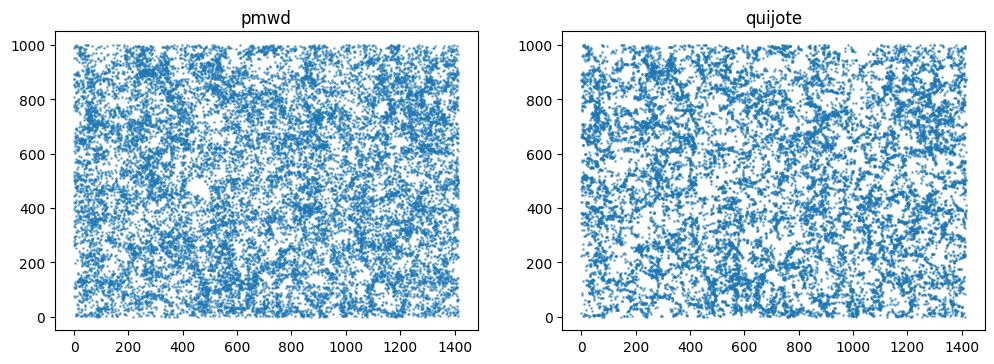

In [15]:
zsli = [500,525]

f, axs = plt.subplots(1, 2, figsize=(12,6))

ax = axs[0]
mask = (pcpos[:,2] > zsli[0]) & (pcpos[:,2] < zsli[1])
x_ = pcpos[mask]
ax.plot(x_[:,0], x_[:,1], 'o', markersize=1, alpha=0.5)
ax.set_title('pmwd')
ax.set_aspect('equal')

ax = axs[1]
mask = (qcpos[:,2] > zsli[0]) & (qcpos[:,2] < zsli[1])
x_ = qcpos[mask]
ax.plot(x_[:,0], x_[:,1], 'o', markersize=1, alpha=0.5)
ax.set_title('quijote')
ax.set_aspect('equal')

### cuboid galaxies

In [16]:
# load hod

lhid = 3

# pmwd
suite = 'calib_1gpch_z0.5'
sim = 'pmwd'
simdir = pjoin(wdir, suite, sim, 'L1000-N128')
source_path = pjoin(simdir, f'{lhid}')
phpos = np.load(pjoin(source_path, 'hod', 'hod0_pos.npy'))
phvel = np.load(pjoin(source_path, 'hod', 'hod0_vel.npy'))

# quijote
suite = 'quijote'
sim = 'latin_hypercube_HR'
simdir = pjoin(wdir, suite, sim, 'L1000-N128')
source_path = pjoin(simdir, f'{lhid}')
qhpos = np.load(pjoin(source_path, 'hod', 'hod0_pos.npy'))
qhvel = np.load(pjoin(source_path, 'hod', 'hod0_vel.npy'))

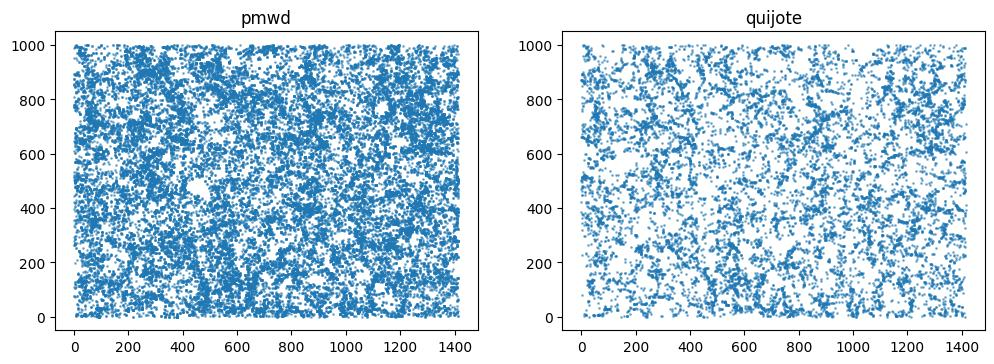

In [17]:
zsli = [500,525]

f, axs = plt.subplots(1, 2, figsize=(12,6))

ax = axs[0]
mask = (phpos[:,2] > zsli[0]) & (phpos[:,2] < zsli[1])
x_ = phpos[mask]
ax.plot(x_[:,0], x_[:,1], 'o', markersize=1, alpha=0.5)
ax.set_title('pmwd')
ax.set_aspect('equal')

ax = axs[1]
mask = (qhpos[:,2] > zsli[0]) & (qhpos[:,2] < zsli[1])
x_ = qhpos[mask]
ax.plot(x_[:,0], x_[:,1], 'o', markersize=1, alpha=0.5)
ax.set_title('quijote')
ax.set_aspect('equal')

### survey galaxies

In [18]:
# load survey

lhid = 3

# pmwd
suite = 'calib_1gpch_z0.5'
sim = 'pmwd'
simdir = pjoin(wdir, suite, sim, 'L1000-N128')
source_path = pjoin(simdir, f'{lhid}')
prdz = np.load(pjoin(source_path, 'obs', 'rdz0.npy'))

# quijote
suite = 'quijote'
sim = 'latin_hypercube_HR'
simdir = pjoin(wdir, suite, sim, 'L1000-N128')
source_path = pjoin(simdir, f'{lhid}')
qrdz = np.load(pjoin(source_path, 'obs', 'rdz0.npy'))

In [19]:
def dtr(deg):
    return deg * np.pi / 180


import cartopy.crs as ccrs
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter


Text(0, 0.5, 'DEC')

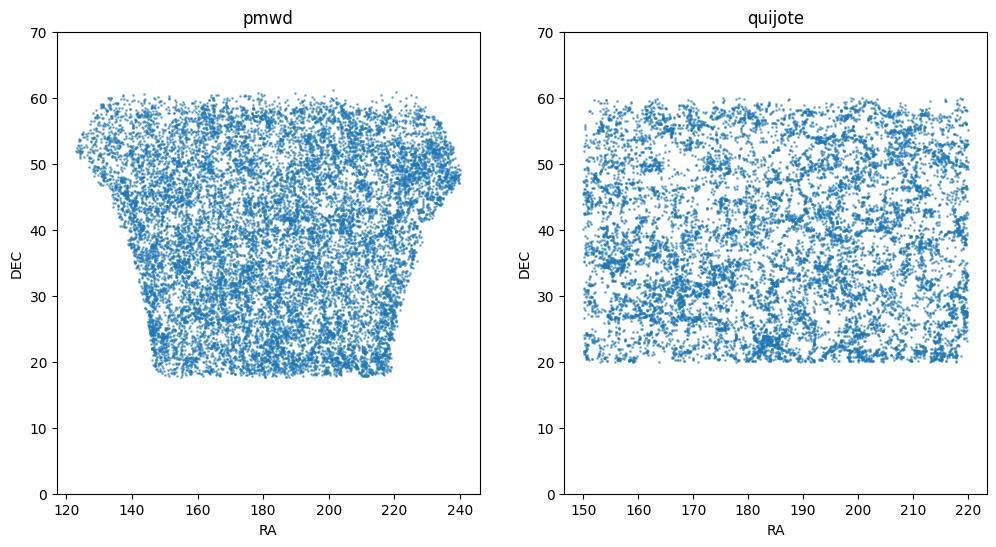

In [20]:
zsli = [0.48, 0.5]

f, axs = plt.subplots(1, 2, figsize=(12,6))

ax = axs[0]
mask = (prdz[:,2] > zsli[0]) & (prdz[:,2] < zsli[1])
x_ = prdz[mask]
ax.plot(x_[:,0], x_[:,1], 'o', markersize=1, alpha=0.5)
ax.set_title('pmwd')
ax.set_ylim(0, 70)
ax.set_xlabel('RA')
ax.set_ylabel('DEC')

ax = axs[1]
mask = (qrdz[:,2] > zsli[0]) & (qrdz[:,2] < zsli[1])
x_ = qrdz[mask]
ax.plot(x_[:,0], x_[:,1], 'o', markersize=1, alpha=0.5)
ax.set_title('quijote')
ax.set_ylim(0, 70)
ax.set_xlabel('RA')
ax.set_ylabel('DEC')


(array([26310., 27234., 26799., 24862., 23237., 21746., 18235., 14678.,  9841.,  7201.]),
 array([0.4 , 0.43, 0.46, 0.49, 0.52, 0.55, 0.58, 0.61, 0.64, 0.67, 0.7 ]),
 <BarContainer object of 10 artists>)

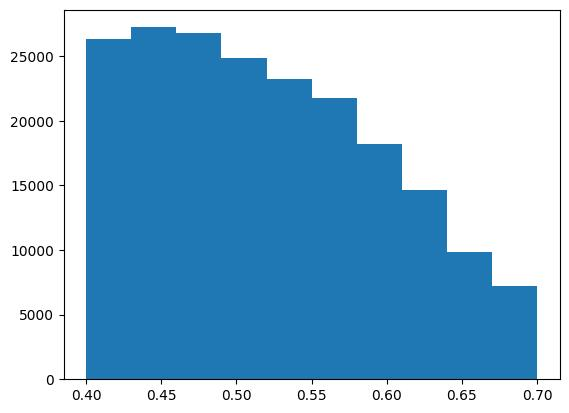

In [21]:
plt.hist(prdz[:,-1])

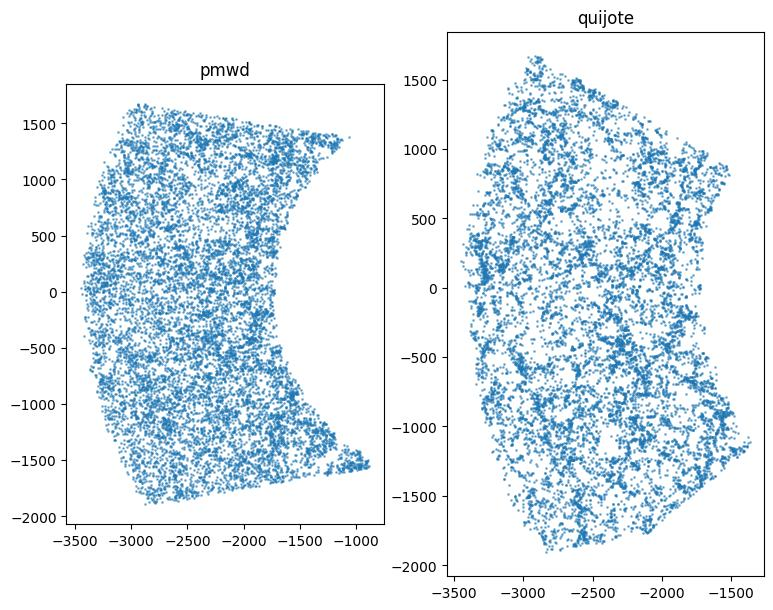

In [22]:
from astropy import units as u
from astropy.cosmology import Planck15
from astropy.coordinates import SkyCoord, Distance

def rdz_to_xyz(rdz):
    # Convert redshift to distance
    distance = Distance(z=rdz[:, 2], cosmology=Planck15)

    # Create SkyCoord object with RA, Dec, and distance
    coords = SkyCoord(ra=rdz[:, 0] * u.deg, dec=rdz[:, 1] * u.deg, distance=distance, frame='icrs')

    # Convert to XYZ comoving coordinates
    xyz = coords.cartesian.xyz.value
    return xyz

zsli = [38, 40]


f, axs = plt.subplots(1, 2, figsize=(9,9))

ax = axs[0]
mask = (prdz[:,1] > zsli[0]) & (prdz[:,1] < zsli[1])
pxyz = rdz_to_xyz(prdz[mask])
x_ = pxyz
ax.plot(x_[0], x_[1], 'o', markersize=1, alpha=0.5)
ax.set_title('pmwd')
ax.set_aspect('equal')
# ax.set_ylim(0, 70)

ax = axs[1]
mask = (qrdz[:,1] > zsli[0]) & (qrdz[:,1] < zsli[1])
qxyz = rdz_to_xyz(qrdz[mask])
x_ = qxyz
ax.plot(x_[0], x_[1], 'o', markersize=1, alpha=0.5)
ax.set_title('quijote')
ax.set_aspect('equal')
# ax.set_ylim(0, 70)

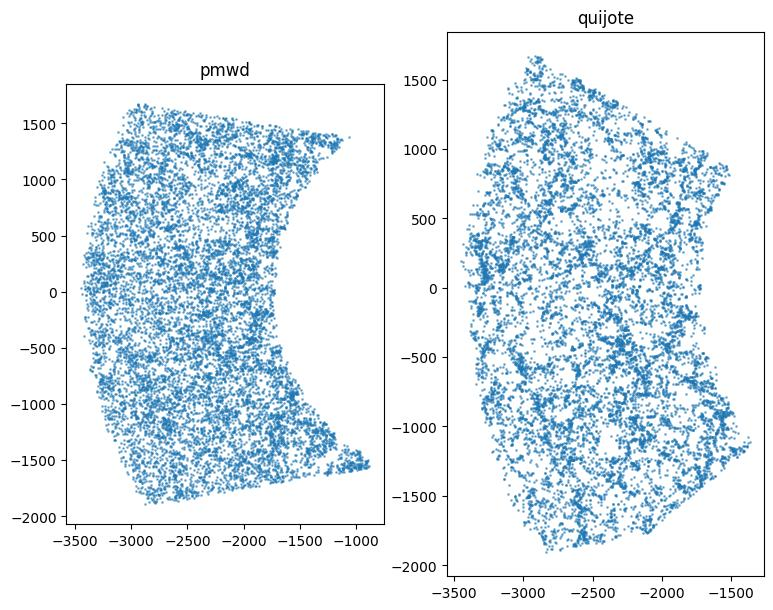

In [23]:
from astropy import units as u
from astropy.cosmology import Planck15
from astropy.coordinates import SkyCoord, Distance

def rdz_to_xyz(rdz):
    # Convert redshift to distance
    distance = Distance(z=rdz[:, 2], cosmology=Planck15)

    # Create SkyCoord object with RA, Dec, and distance
    coords = SkyCoord(ra=rdz[:, 0] * u.deg, dec=rdz[:, 1] * u.deg, distance=distance, frame='icrs')

    # Convert to XYZ comoving coordinates
    xyz = coords.cartesian.xyz.value
    return xyz

zsli = [38, 40]


f, axs = plt.subplots(1, 2, figsize=(9,9))

ax = axs[0]
mask = (prdz[:,1] > zsli[0]) & (prdz[:,1] < zsli[1])
pxyz = rdz_to_xyz(prdz[mask])
x_ = pxyz
ax.plot(x_[0], x_[1], 'o', markersize=1, alpha=0.5)
ax.set_title('pmwd')
ax.set_aspect('equal')
# ax.set_ylim(0, 70)

ax = axs[1]
mask = (qrdz[:,1] > zsli[0]) & (qrdz[:,1] < zsli[1])
qxyz = rdz_to_xyz(qrdz[mask])
x_ = qxyz
ax.plot(x_[0], x_[1], 'o', markersize=1, alpha=0.5)
ax.set_title('quijote')
ax.set_aspect('equal')
# ax.set_ylim(0, 70)

## 2 Gpc/h

In [54]:
wdir = '/home/mattho/git/ltu-cmass/data'
path_to_cal = pjoin(wdir, 'inf_2gpch')

sim = 'pmwd'
simdir = pjoin(path_to_cal, sim, 'L2000-N256')

In [57]:
lhids = os.listdir(simdir)
counter = defaultdict(int)
bad = []
for lh in lhids:
    lpath = pjoin(simdir, lh)
    files = os.listdir(lpath)
    for f in files:
        counter[f] += 1
    if 'halo_mass.npy' not in files:
        bad.append(lh)
counter

defaultdict(int, {'rho.npy': 72, 'fvel.npy': 72, 'config.yaml': 72})

In [58]:
# load comoving

lhid = 19

# pmwd 2 gpc/h
suite = 'inf_2gpch'
sim = 'pmwd'
simdir = pjoin(wdir, suite, sim, 'L2000-N256')
source_path = pjoin(simdir, f'{lhid}')
p2rho = np.load(pjoin(source_path, 'rho.npy'))
p2fvel = np.load(pjoin(source_path, 'fvel.npy'))

# quijote 1 gpc/h
simdir = '/home/mattho/data/quijote/density_field/latin_hypercube/'
source_path = pjoin(simdir, f'{lhid}')
qrho = np.load(pjoin(source_path, 'df_m_128_z=0.npy'))

# pmwd 1 gpc/h
suite = 'calib_1gpch_z0.5'
sim = 'pmwd'
simdir = pjoin(wdir, suite, sim, 'L1000-N128')
source_path = pjoin(simdir, f'{lhid}')
p1rho = np.load(pjoin(source_path, 'rho.npy'))
p1fvel = np.load(pjoin(source_path, 'fvel.npy'))

FileNotFoundError: [Errno 2] No such file or directory: '/home/mattho/git/ltu-cmass/data/inf_2gpch/pmwd/L2000-N256/19/rho.npy'

Text(0.5, 1.0, 'pmwd 2gpch')

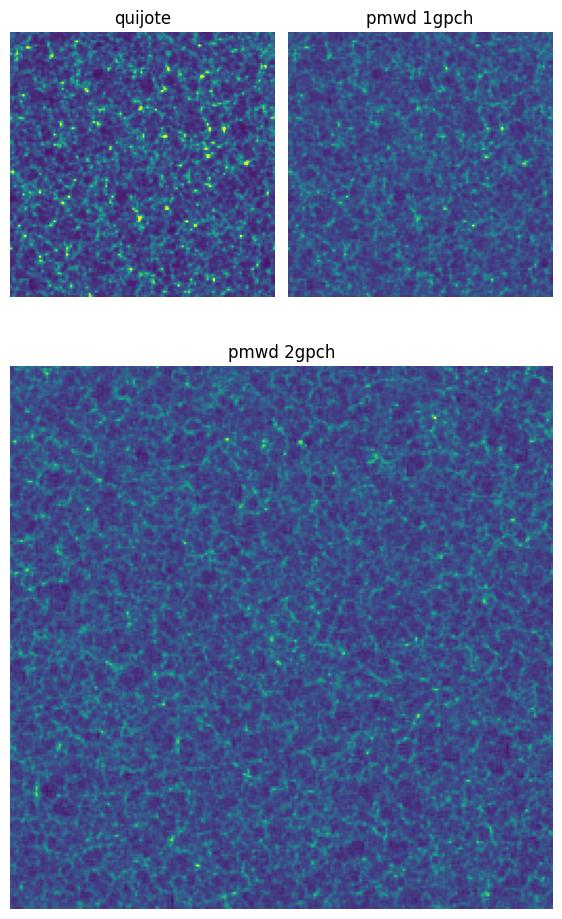

In [61]:
zs = [100,105]
vmin, vmax = -1, 3

f = plt.figure(figsize=(7,12))
gs = mpl.gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[1, 2],
                           wspace=0.05, hspace=0.05)

ax = f.add_subplot(gs[0, 0])
ax.imshow(np.mean(qrho[:,:,zs[0]:zs[1]], axis=2), vmin=vmin, vmax=vmax)
ax.axis('off')
ax.set_title('quijote')

ax = f.add_subplot(gs[0,1])
ax.imshow(np.mean(p1rho[:,:,zs[0]:zs[1]], axis=2), vmin=vmin, vmax=vmax)
ax.axis('off')
ax.set_title('pmwd 1gpch')

ax = f.add_subplot(gs[1,:])
ax.imshow(np.mean(p2rho[:,:,zs[0]:zs[1]], axis=2), vmin=vmin, vmax=vmax)
ax.axis('off')
ax.set_title('pmwd 2gpch')

Text(0.5, 1.0, 'pmwd 2gpch (zoomed 2x)')

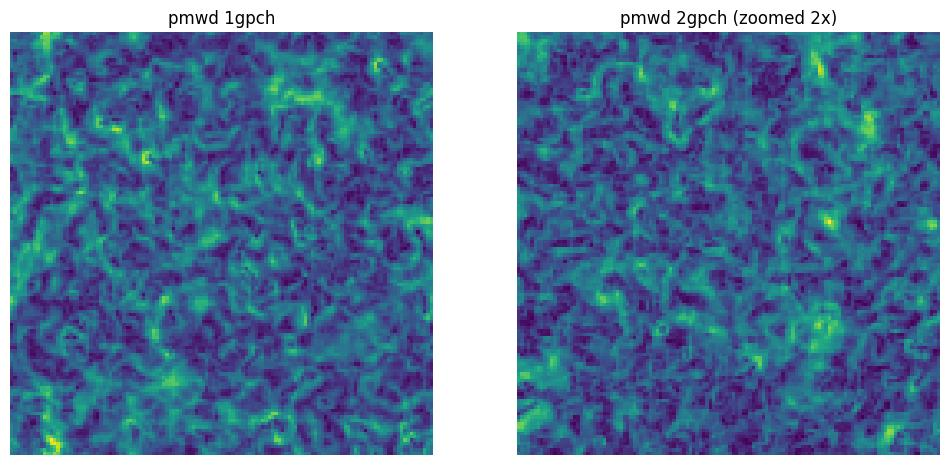

In [60]:
# plot fvel
f, axs = plt.subplots(1, 2, figsize=(12,6))

im = np.linalg.norm(p1fvel[100], axis=-1)
axs[0].imshow(im)
axs[0].axis('off')
axs[0].set_title('pmwd 1gpch')

im = np.linalg.norm(p2fvel[100, :128, :128], axis=-1)
axs[1].imshow(im)
axs[1].axis('off')
axs[1].set_title('pmwd 2gpch (zoomed 2x)')